# Giovano Panatta

# Análise Exploratória de Dados Imobiliários

Neste projeto de análise exploratória de dados (EDA) do mercado imobiliário, focamos em entender as características dos lotes, incluindo a frente ('Lot Frontage') e a área ('Lot Area'), e examinamos as variáveis categóricas 'MS Zoning' e 'Lot Shape'. Utilizamos estatísticas descritivas e boxplots para investigar as propriedades contínuas, identificando a distribuição central e possíveis outliers. Para as variáveis categóricas, exploramos a distribuição dos dados usando gráficos de barras, que nos permitiram visualizar a prevalência das diferentes zonas e formatos de lotes no conjunto de dados. Essa análise nos deu uma visão geral sobre os padrões e variações dentro do mercado imobiliário, essencial para compreender as dinâmicas do setor e para apoiar decisões relacionadas a investimentos, desenvolvimento e planejamento urbano.

# Dicionário de Dados do Mercado Imobiliário

| Coluna            | Descrição                                        |
|-------------------|--------------------------------------------------|
| Unnamed: 0        | Índice do DataFrame, não parte do conjunto original |
| Order             | Número de ordem do imóvel                        |
| PID               | Identificação da parcela do imóvel               |
| MS SubClass       | O tipo de moradia envolvida na venda             |
| MS Zoning         | Classificação geral de zoneamento                |
| Lot Frontage      | Distância linear em pés da rua conectada ao lote |
| Lot Area          | Tamanho do lote em pés quadrados                 |
| Street            | Tipo de acesso rodoviário ao lote                |
| Alley             | Tipo de acesso ao beco                           |
| Lot Shape         | Forma geral da propriedade                       |
| Land Contour      | Planura do lote                                  |
| Utilities         | Tipos de utilitários disponíveis                 |
| Lot Config        | Configuração do lote                             |
| Land Slope        | Inclinação do lote                               |
| Neighborhood      | Localizações físicas dentro dos limites da cidade de Ames |
| Condition 1       | Proximidade a várias condições                   |
| Condition 2       | Proximidade a várias condições (se mais de uma)  |
| Bldg Type         | Tipo de habitação                                |
| House Style       | Estilo de habitação                              |
| Overall Qual      | Qualidade geral do material e do acabamento      |
| Overall Cond      | Condição geral da casa                           |
| Year Built        | Data original de construção                      |
| Year Remod/Add    | Data de remodelação                              |
| Roof Style        | Tipo de telhado                                  |
| Roof Matl         | Material do telhado                              |
| Exterior 1st      | Cobertura externa da casa                        |
| Exterior 2nd      | Cobertura externa da casa (se mais de um material) |
| Mas Vnr Type      | Tipo de alvenaria                                |
| Mas Vnr Area      | Área de alvenaria em pés quadrados               |
| Exter Qual        | Qualidade do material externo                    |
| Exter Cond        | Condição atual do material externo               |
| Foundation        | Tipo de fundação                                 |
| Bsmt Qual         | Altura do porão                                  |
| Bsmt Cond         | Condição geral do porão                          |
| Bsmt Exposure     | Paredes do porão de nível de jardim ou saída     |
| BsmtFin Type 1    | Qualidade da área acabada do porão               |
| BsmtFin SF 1      | Pés quadrados acabados do Tipo 1                 |
| BsmtFin Type 2    | Qualidade da segunda área acabada (se presente)  |
| BsmtFin SF 2      | Pés quadrados acabados do Tipo 2                 |
| Bsmt Unf SF       | Pés quadrados não acabados do porão              |
| Total Bsmt SF     | Total de pés quadrados da área do porão          |
| Heating           | Tipo de aquecimento                              |
| Heating QC        | Qualidade e condição do aquecimento              |
| Central Air       | Ar condicionado central                          |
| Electrical        | Sistema elétrico                                 |
| 1st Flr SF        | Pés quadrados do primeiro andar                  |
| 2nd Flr SF        | Pés quadrados do segundo andar                   |
| Low Qual Fin SF   | Pés quadrados com acabamento de baixa qualidade  |
| Gr Liv Area       | Área de moradia acima do solo em pés quadrados   |
| Bsmt Full Bath    | Banheiros completos no porão                     |
| Bsmt Half Bath    | Lavabos no porão                                 |
| Full Bath         | Banheiros completos acima do solo                |
| Half Bath         | Lavabos acima do solo                            |
| Bedroom AbvGr     | Quartos acima do solo                            |
| Kitchen AbvGr     | Cozinhas acima do solo                           |
| Kitchen Qual      | Qualidade da cozinha                             |
| TotRms AbvGrd     | Total de quartos acima do solo ( &#8203;``【oaicite:0】``&#8203;


In [1]:
#Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#verficando os tipos de dados
data.dtypes

Order               int64
PID                 int64
MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
                   ...   
Mo Sold             int64
Yr Sold             int64
Sale Type          object
Sale Condition     object
SalePrice           int64
Length: 82, dtype: object

**Obs**: como obtivemos uma grande quantidade de colunas e seus respectivos tipos de dados, vamos abordar essa questão com um dtypes junto ao value_counts() para termos uma visão mais abrangente do DF/dados:

In [ ]:
types = data.dtypes.value_counts()
print(types)

object     43
int64      28
float64    11
dtype: int64


**Plano de Ação do Projeto**
**Passo 1: Seleção de Variáveis**

Primeiramente, identificaremos e selecionaremos duas variáveis numéricas contínuas e duas variáveis categóricas do conjunto de dados. Essa escolha é feita com base nos critérios que excluem as variáveis "Order", "PID", "Year Built", "Year Remod/Add" e "SalePrice" devido à sua natureza identificatória, temporal ou final (preço de venda) que não se encaixam no objetivo de uma análise exploratória inicial. A seleção visa entender as características físicas e de localização dos imóveis, aspectos mais permanentes e influentes no valor imobiliário do que as variáveis excluídas.

**Variáveis Numéricas Contínuas**

Optaremos por 'Lot Frontage' e 'Lot Area', pois representam aspectos fundamentais do lote: a frente do lote (a linha de frente do terreno que toca a rua) e a área total do lote. Ambas têm potencial para influenciar significativamente o valor e a atratividade de um imóvel no mercado.

**Variáveis Categóricas**

Selecionaremos 'MS Zoning', que indica a classificação geral de zoneamento do lote (como residencial, comercial), e 'Lot Shape', que descreve a forma geral da propriedade. Essas variáveis categóricas são escolhidas por oferecerem insights sobre a localização e as características físicas do terreno que podem afetar o interesse do comprador e regulamentações aplicáveis.

**Passo 2: Criação de um Novo DataFrame**

Com essas variáveis selecionadas, criaremos um novo DataFrame. Isso nos permitirá focar nossa análise nestes aspectos específicos, facilitando uma investigação mais detalhada e gerando insights mais claros sobre como as características físicas e de zoneamento impactam o mercado imobiliário.

**Passo 3: Execução de Tarefas**

A partir deste novo DataFrame, executaremos tarefas analíticas, como calcular estatísticas descritivas para as variáveis contínuas e visualizar a distribuição das variáveis categóricas. Essas ações são fundamentais para entender as dinâmicas do mercado imobiliário e para identificar padrões ou tendências que possam informar decisões de investimento ou políticas de desenvolvimento urbano.

**Justificativa**

A razão por trás dessa abordagem é maximizar o entendimento das características imobiliárias que têm um impacto direto no valor percebido e na desejabilidade de um imóvel. Ao concentrar-se em variáveis que descrevem diretamente o terreno e a zona em que se encontra, podemos obter insights valiosos sobre o que torna um imóvel atraente no mercado. Este foco nos permite avaliar de forma mais precisa e significativa os fatores que afetam o valor imobiliário, além de fornecer uma base sólida para análises mais aprofundadas ou modelos preditivos no futuro.

In [ ]:
#Criando uma lista das variáveis que devem ser exlcuídas
excluded = ['Order', 'PID', 'Year Built', 'Year Remod/Add', 'SalePrice']

#Atribuindo ao data_2 o resultado de drop do dataframe original
data_2 = data.drop(columns= excluded)

In [ ]:
#Utilizando o metodo select_detypes 
# Criando uma lista com columns.tolist() das colunas numéricas e categóricas a partir de 'data_2'
numerical_cols = data_2.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = data_2.select_dtypes(include=['object']).columns.tolist()

# Inicializando listas vazias para as variáveis numéricas contínuas e categóricas
numerical_continuous = []
categorical_filtered = []

# Usando um laço for para selecionar duas variáveis numéricas contínuas
for col in numerical_cols:
    if data_2[col].nunique() > 20: #Se a coluna iterada tiver mais de 20 valores unicos / indica valors continuos
        numerical_continuous.append(col) # irá apendar na variável numerical_continuos ao final da lista
    if len(numerical_continuous) == 2: # se houver mais de duas colunas em numerical_continuos...
        break #o laço for é interrompido

# Usando outro laço for para selecionar duas variáveis categóricas com pelo menos 3 valores únicos
for col in categorical_cols:
    if data_2[col].nunique() >= 3: # se em data_2 houver nomes equivalentes a [col] e com valores unicos > 3
        categorical_filtered.append(col)
    if len(categorical_filtered) == 2:
        break

# Criando o novo dataframe apenas com as variáveis escolhidas
selected_variables = numerical_continuous + categorical_filtered #lista de referências obtidas pelo loop for
final_data = data_2[selected_variables] #novo dataframe criado a a partir de data_2 com as variáveis apropriadas

final_data.head() , numerical_continuous, categorical_filtered




(   Lot Frontage  Lot Area MS Zoning Lot Shape
 0         141.0     31770        RL       IR1
 1          80.0     11622        RH       Reg
 2          81.0     14267        RL       IR1
 3          93.0     11160        RL       Reg
 4          74.0     13830        RL       IR1,
 ['Lot Frontage', 'Lot Area'],
 ['MS Zoning', 'Lot Shape'])

In [ ]:
#verificando as 4 variáveis finais e seus tipos de dados em final_data

final_data.dtypes

Lot Frontage    float64
Lot Area          int64
MS Zoning        object
Lot Shape        object
dtype: object

**Obs:** No caso específico de Lot Area (código acima), embora os valores sejam inteiros, eles representam uma medição que, em teoria, poderia ser qualquer valor positivo. Além disso, a área do lote é tipicamente uma medida com uma grande quantidade de valores possíveis, o que justifica seu tratamento como uma variável contínua em análises estatísticas e modelagem.

Agora, calcularemos as médias e medianas para 'Lot Frontage' e 'Lot Area' para avaliar a distribuição desses dados. Comparando essas métricas, identificaremos se a presença de outliers é evidente. A proximidade entre média e mediana indica uma distribuição equilibrada, enquanto uma grande discrepância sugere outliers que puxam a média para longe da mediana. Este passo é crucial para entender como as características físicas dos lotes variam e como isso pode impactar nossa análise do mercado imobiliário.

In [ ]:
continuos_stats = {
    'Lot Frontage':{
    'mean': final_data['Lot Frontage'].mean(),
    'median':final_data['Lot Frontage'].median()
},
    'Lot Area': {
        'mean': final_data['Lot Area'].mean(),
        'median': final_data['Lot Area'].median()
    }
}

continuos_stats

{'Lot Frontage': {'mean': 69.22459016393442, 'median': 68.0},
 'Lot Area': {'mean': 10147.921843003413, 'median': 9436.5}}

Considerações:

- Média (ou média aritmética): A média é a soma de todos os valores dividida pelo número de valores. É uma medida de tendência central que pode ser afetada por valores extremamente altos ou baixos (outliers).

- Mediana: A mediana é o valor que divide os dados ao meio quando ordenados, ou seja, metade dos dados está abaixo da mediana e a outra metade está acima. A mediana é menos sensível a outliers do que a média, pois não é afetada pelo valor real dos extremos.


Lot Frontage:

A média e a mediana da metragem frontal dos lotes são muito próximas, o que significa que a maioria dos lotes tem uma metragem frontal semelhante. Isso sugere que não há uma grande diferença entre os tamanhos dos lotes, ou que os lotes muito grandes ou muito pequenos não são muito comuns.


Lot Area:

A área dos lotes é uma medida do tamanho total do lote. A média da área dos lotes é maior que a mediana, o que significa que há alguns lotes que são muito maiores do que a maioria. Isso sugere que há uma distribuição assimétrica dos dados, com uma cauda mais longa à direita.

Agora, utilizaremos boxplots para identificar a ocorrência ou não de outliers nas mesmas duas variáveis contínuas escolhidas. Justifique suas respostas.

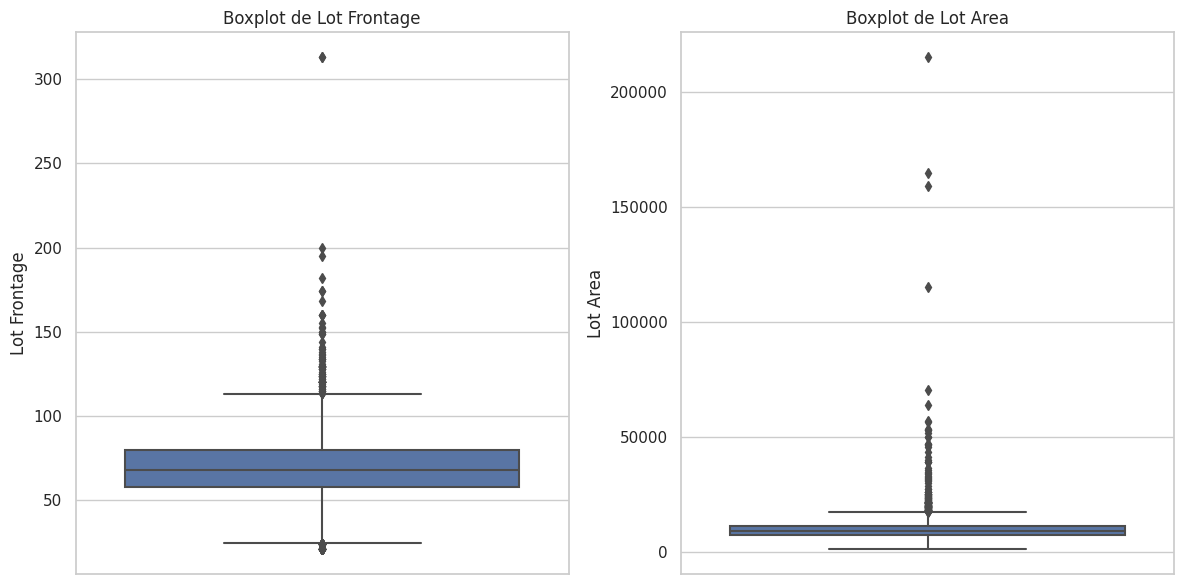

In [ ]:
#Estilo dos gráficos
sns.set(style ='whitegrid')

#Criando boxplots
plt.figure(figsize=(12, 6))

#Boxpplot para Lot Frontage
plt.subplot(1, 2, 1) #1 linha, 2 colunas, utilização da coluna 1
sns.boxplot(y=final_data['Lot Frontage']) #plotar no eyxo y - vertical
plt.title("Boxplot de Lot Frontage")

# Boxplot para 'Lot Area'
plt.subplot(1, 2, 2) #1 linha, 2 colunas, utilização da coluna 2
sns.boxplot(y=final_data['Lot Area']) # plotar no eixo y - vertical
plt.title('Boxplot de Lot Area')

plt.tight_layout()
plt.show()

**Conclusões:**

* Lot Frontage: A maioria dos lotes tem uma metragem frontal semelhante, com uma distribuição relativamente simétrica. Há alguns outliers, mas eles não são excessivamente extremos.



* Lote Area: A área dos lotes é mais variada, com uma distribuição assimétrica positiva.
Há muitos lotes que são significativamente maiores do que o tamanho médio.
A média não é uma representação precisa do tamanho típico dos lotes.

**Conclusão:**
A metragem frontal dos lotes é relativamente uniforme, com apenas alguns outliers. Já a área dos lotes é mais variada, com muitos outliers que distorcem a média.

**Agora, utilizaremos gráficos de barras para apresentar as estruturas dos dados presentes em todas as variáveis categóricas escolhidas.**


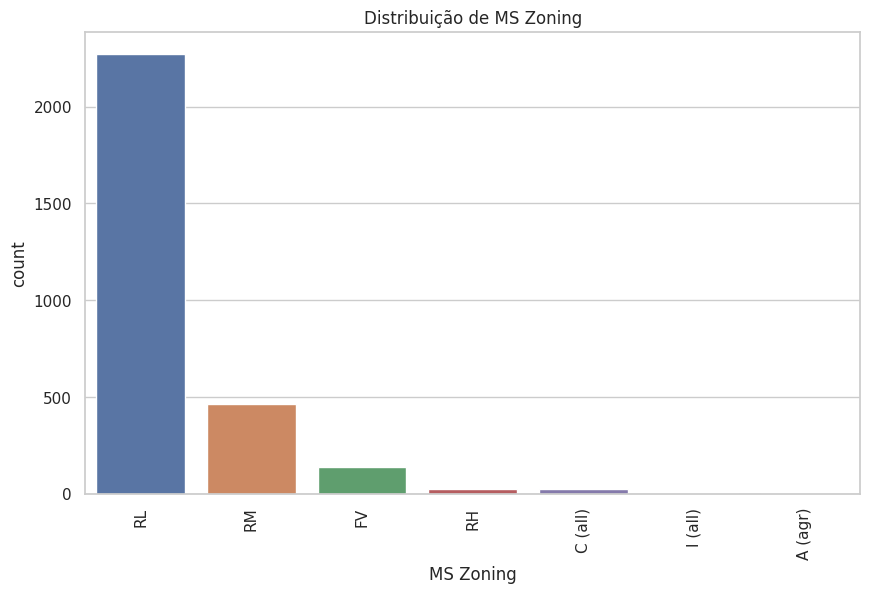

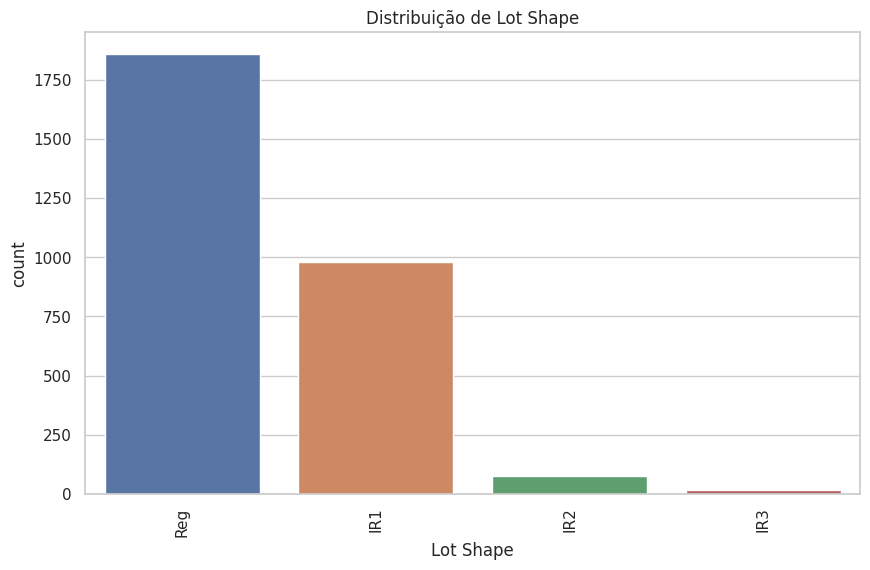

In [ ]:
# Selecionando as variáveis categóricas do 'final_data'
#Utilizamos esse código para automatizar, mas dado o pequeno conjunto de colunas categórica, poderia ser manual
categorical_vars = final_data.select_dtypes(include=['object']).columns.tolist()

# Agora criaremos um gráfico de barras para cada variável categórica
for var in categorical_vars:
    plt.figure(figsize=(10, 6))  # Definindo o tamanho da figura para cada gráfico
    order = final_data[var].value_counts().index  # Ordenando as barras pela contagem, index = ordem decrescente
    sns.countplot(x=var, data=final_data, order=order)
     #A ordem (order) é decresencente conforme os comandas da variável em order anterior
    plt.title(f'Distribuição de {var}')
    plt.xticks(rotation=90)  # Rotação dos labels no eixo x
    plt.show()  # Exibindo cada gráfico individualmente



Para nosso próximo objetivo no projeto, vamos aprofundar nossa análise das variáveis contínuas 'Lot Frontage' e 'Lot Area', utilizando os boxplots como ferramentas chave. Extrairemos e apresentaremos informações detalhadas para cada variável, incluindo:

Mediana: Indicador central que divide o conjunto de dados ao meio.
Valor Máximo e Mínimo para 50% das Observações: Os limites do primeiro e terceiro quartis, que encapsulam a maioria dos dados.
Valor Máximo que Não é Considerado Outlier: O limite superior para dados regulares, além do qual os valores são tratados como outliers.
Valor Mínimo que Não é Considerado Outlier: O limite inferior para a regularidade dos dados.
Esses dados serão essenciais para entender a distribuição e a variabilidade de 'Lot Frontage' e 'Lot Area', permitindo-nos identificar não apenas os padrões comuns, mas também os pontos extremos que podem influenciar tanto a análise quanto futuras decisões de investimento imobiliário. Esse objetivo visa oferecer uma compreensão mais nuançada e completa das características do mercado imobiliário que estamos estudando.

In [ ]:
# Obtendo estatísticas descritivas básicas com describe()
estatisticas_descritivas = final_data[['Lot Frontage', 'Lot Area']].describe()

# Calculando o Intervalo Interquartil (IQR)
iqr = estatisticas_descritivas.loc['75%'] - estatisticas_descritivas.loc['25%']

# Determinando os whiskers (valores máximos e mínimos que não são considerados outliers)
whisker_superior = estatisticas_descritivas.loc['75%'] + 1.5 * iqr # regra comum para identificar outliers.
whisker_inferior = estatisticas_descritivas.loc['25%'] - 1.5 * iqr# regra comum para identificar outliers.

#A função clip() é usada para garantir que os whiskers não excedam os valores máximos e mínimos reais do conjunto
whisker_superior = whisker_superior.clip(upper=final_data[['Lot Frontage', 'Lot Area']].max())
whisker_inferior = whisker_inferior.clip(lower=final_data[['Lot Frontage', 'Lot Area']].min())

#Imprimindo as informações:
print("Análise dos Boxplots:")
print("Medianas:")
print(estatisticas_descritivas.loc['50%'])
print("Máximo para 50% das observações (Q3):")
print(estatisticas_descritivas.loc['75%'])
print("Mínimo para 50% das observações (Q1):")
print(estatisticas_descritivas.loc['25%'])
print("Valor máximo não considerado um outlier (Whisker Superior):")
print(whisker_superior)
print("Valor mínimo não considerado um outlier (Whisker Inferior):")
print(whisker_inferior)


Análise dos Boxplots:
Medianas:
Lot Frontage      68.0
Lot Area        9436.5
Name: 50%, dtype: float64
Máximo para 50% das observações (Q3):
Lot Frontage       80.00
Lot Area        11555.25
Name: 75%, dtype: float64
Mínimo para 50% das observações (Q1):
Lot Frontage      58.00
Lot Area        7440.25
Name: 25%, dtype: float64
Valor máximo não considerado um outlier (Whisker Superior):
Lot Frontage      113.00
Lot Area        17727.75
dtype: float64
Valor mínimo não considerado um outlier (Whisker Inferior):
Lot Frontage      25.0
Lot Area        1300.0
dtype: float64
